Q. Principal Component Analysis (PCA)

Dataset: You can choose any dataset of your interest from publicly available datasets or use your own dataset.

Tasks:
- Load the dataset and perform necessary preprocessing steps, such as handling missing values, scaling, etc.
- Implement PCA from scratch using Python, NumPy, and Matplotlib, and apply it to the dataset.
- Use the scikit-learn library to apply PCA to the dataset and compare the results with the implementation from scratch.
- Visualize the results of PCA using Matplotlib or any other visualization library of your choice.
- Evaluate the performance of PCA by calculating the explained variance ratio for each principal component and selecting the appropriate number of principal components for the dataset.
- Use the selected number of principal components to reconstruct the original dataset and calculate the reconstruction error.
- Compare the results of PCA with and without dimensionality reduction using a classification algorithm of your choice, such as logistic regression, k-means clustering, or support vector machines.
- Write a brief report summarizing your findings and observations.

A.
## K-Means Clustering and PCA of Human Activity Recognition

### Intro

In this project I will use my knowledge of clustering and PCA algorithms to explore the Human Activity Recognition dataset. 

### Dataset info

Human Activity Recognition database built from the recordings of 30 subjects performing activities of daily living (ADL) while carrying a waist-mounted smartphone with embedded inertial sensors. The experiments have been carried out with a group of 30 volunteers within an age bracket of 19-48 years. Each person performed six activities (*WALKING, WALKING_UPSTAIRS, WALKING_DOWNSTAIRS, SITTING, STANDING, LAYING*) wearing a smartphone (Samsung Galaxy S II) on the waist. Using its embedded accelerometer and gyroscope, we captured 3-axial linear acceleration and 3-axial angular velocity at a constant rate of 50Hz.

In [1]:
import random 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler
from IPython.display import display
from sklearn.cluster import KMeans 
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import homogeneity_score, completeness_score, \
v_measure_score, adjusted_rand_score, adjusted_mutual_info_score, silhouette_score
%matplotlib inline

np.random.seed(123)

In [2]:
Data = pd.read_csv(r'C:\Users\abhis\OneDrive\Desktop\Work\Projects\PCA via K- Means Clustering\train.csv') 

In [3]:
Data.sample(5)

,rn,activity,tBodyAcc.mean.X,tBodyAcc.mean.Y,tBodyAcc.mean.Z,tBodyAcc.std.X,tBodyAcc.std.Y,tBodyAcc.std.Z,tBodyAcc.mad.X,tBodyAcc.mad.Y,...,fBodyBodyGyroJerkMag.meanFreq,fBodyBodyGyroJerkMag.skewness,fBodyBodyGyroJerkMag.kurtosis,angle.tBodyAccMean.gravity,angle.tBodyAccJerkMean.gravityMean,angle.tBodyGyroMean.gravityMean,angle.tBodyGyroJerkMean.gravityMean,angle.X.gravityMean,angle.Y.gravityMean,angle.Z.gravityMean
613,1739,WALKING_UPSTAIRS,0.241,-0.00873,-0.1060,-0.216,0.3220,-0.0801,-0.267,0.315,...,0.358,-0.726,-0.9410,0.86900,0.337,-0.916,0.7750,-0.686,0.314,0.034
2306,6598,WALKING_DOWNSTAIRS,0.238,-0.03990,-0.1580,0.284,0.2270,-0.1330,0.245,0.214,...,0.302,-0.190,-0.5850,0.09500,-0.684,0.937,-0.6360,-0.749,0.235,0.127
800,2291,LAYING,0.280,-0.02310,-0.0998,-0.978,-0.9650,-0.9690,-0.980,-0.964,...,0.494,-0.863,-0.9560,-0.12800,0.262,-0.098,0.0558,0.420,-0.278,-0.714
1621,4615,LAYING,0.320,0.03790,-0.1530,-0.642,-0.5340,-0.7920,-0.647,-0.615,...,0.309,-0.388,-0.7290,0.00812,-0.139,0.170,0.5200,0.685,-0.250,-0.760
1436,4111,WALKING,0.211,-0.04250,-0.0977,-0.324,-0.0342,-0.2350,-0.362,-0.031,...,0.241,0.320,0.0199,0.30500,-0.493,0.727,-0.4360,-0.572,0.344,0.182


In [4]:
print('Shape of the data set: ' + str(Data.shape))

Shape of the data set: (3609, 563)


In [5]:
#save labels as string
Labels = Data['activity']
Data = Data.drop(['rn', 'activity'], axis = 1)
Labels_keys = Labels.unique().tolist()
Labels = np.array(Labels)
print('Activity labels: ' + str(Labels_keys))

Activity labels: ['STANDING', 'SITTING', 'LAYING', 'WALKING', 'WALKING_DOWNSTAIRS', 'WALKING_UPSTAIRS']


In [6]:
#check for missing values
Temp = pd.DataFrame(Data.isnull().sum())
Temp.columns = ['Sum']
print('Amount of rows with missing values: ' + str(len(Temp.index[Temp['Sum'] > 0])) )

Amount of rows with missing values: 0


In [7]:
#normalize the dataset
scaler = StandardScaler()
Data = scaler.fit_transform(Data)

c:\Users\abhis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\abhis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\abhis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\abhis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value 

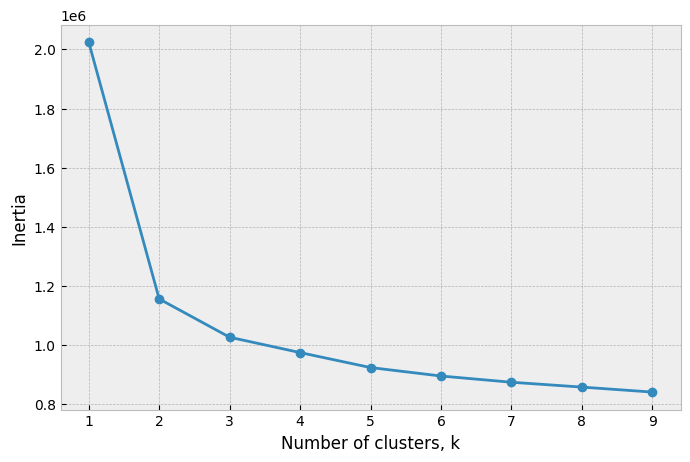

In [8]:
#check the optimal k value
ks = range(1, 10)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(Data)
    inertias.append(model.inertia_)

plt.figure(figsize=(8,5))
plt.style.use('bmh')
plt.plot(ks, inertias, '-o')
plt.xlabel('Number of clusters, k')
plt.ylabel('Inertia')
plt.xticks(ks)
plt.show()

**Looks like the best value ("elbow" of the line) for k is 2 (two clusters).**

In [9]:
def k_means(n_clust, data_frame, true_labels):
    """
    Function k_means applies k-means clustering alrorithm on dataset and prints the crosstab of cluster and actual labels 
    and clustering performance parameters.
    
    Input:
    n_clust - number of clusters (k value)
    data_frame - dataset we want to cluster
    true_labels - original labels
    
    Output:
    1 - crosstab of cluster and actual labels
    2 - performance table
    """
    k_means = KMeans(n_clusters = n_clust, random_state=123, n_init=30)
    k_means.fit(data_frame)
    c_labels = k_means.labels_
    df = pd.DataFrame({'clust_label': c_labels, 'orig_label': true_labels.tolist()})
    ct = pd.crosstab(df['clust_label'], df['orig_label'])
    y_clust = k_means.predict(data_frame)
    display(ct)
    print('% 9s' % 'inertia  homo    compl   v-meas   ARI     AMI     silhouette')
    print('%i   %.3f   %.3f   %.3f   %.3f   %.3f    %.3f'
      %(k_means.inertia_,
      homogeneity_score(true_labels, y_clust),
      completeness_score(true_labels, y_clust),
      v_measure_score(true_labels, y_clust),
      adjusted_rand_score(true_labels, y_clust),
      adjusted_mutual_info_score(true_labels, y_clust),
      silhouette_score(data_frame, y_clust, metric='euclidean')))

*More on clustering metrics can be found in [DataCamp Tutorial](https://www.datacamp.com/community/tutorials/machine-learning-python).*

In [10]:
k_means(n_clust=2, data_frame=Data, true_labels=Labels)

orig_label,LAYING,SITTING,STANDING,WALKING,WALKING_DOWNSTAIRS,WALKING_UPSTAIRS
clust_label,,,,,,
0,680,622,668,0,0,6
1,1,1,0,603,493,535


inertia  homo    compl   v-meas   ARI     AMI     silhouette
1156484   0.378   0.981   0.546   0.329   0.546    0.390


**It looks like algorithm found patterns for Moving and Not-Moving activity with high level of accuracy.**

**Check how it will cluster by 6 clusters (original number of classes).**

In [11]:
k_means(n_clust=6, data_frame=Data, true_labels=Labels)

orig_label,LAYING,SITTING,STANDING,WALKING,WALKING_DOWNSTAIRS,WALKING_UPSTAIRS
clust_label,,,,,,
0,554,21,0,0,0,0
1,0,0,0,248,311,97
2,1,0,0,329,107,438
3,20,445,479,0,0,0
4,0,0,0,26,75,4
5,106,157,189,0,0,2


inertia  homo    compl   v-meas   ARI     AMI     silhouette
895967   0.548   0.589   0.568   0.429   0.567    0.113


**Doesn't look like good connection between clusters and original labels so I will stick with 2 clusters.**

In [12]:
#change labels into binary: 0 - not moving, 1 - moving
Labels_binary = Labels.copy()
for i in range(len(Labels_binary)):
    if (Labels_binary[i] == 'STANDING' or Labels_binary[i] == 'SITTING' or Labels_binary[i] == 'LAYING'):
        Labels_binary[i] = 0
    else:
        Labels_binary[i] = 1
Labels_binary = np.array(Labels_binary.astype(int))

In [13]:
k_means(n_clust=2, data_frame=Data, true_labels=Labels_binary)

orig_label,0,1
clust_label,,
0,1970,6
1,2,1631


inertia  homo    compl   v-meas   ARI     AMI     silhouette
1156484   0.977   0.978   0.978   0.991   0.978    0.390


### Principal component analysis (PCA)

> Principal Component Analysis is a dimension-reduction tool that can be used to reduce a large set of variables to a small set that still contains most of the information in the large set.

**2-cluster algorithm seems to fbe able to find patterns for moving/not-moving labels perfectly so far, but let's see if it can still be improved by dimension reduction. **

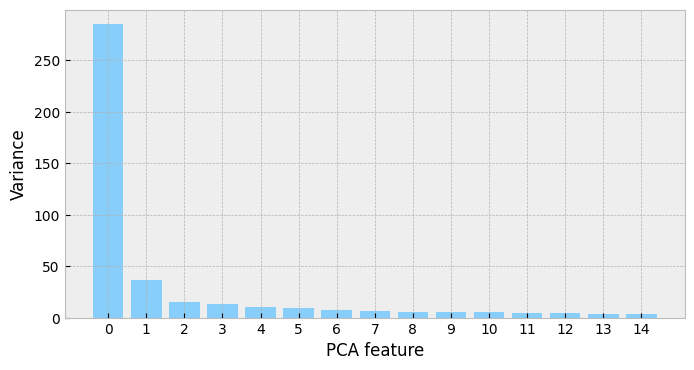

In [14]:
#check for optimal number of features
pca = PCA(random_state=123)
pca.fit(Data)
features = range(pca.n_components_)

plt.figure(figsize=(8,4))
plt.bar(features[:15], pca.explained_variance_[:15], color='lightskyblue')
plt.xlabel('PCA feature')
plt.ylabel('Variance')
plt.xticks(features[:15])
plt.show()

**1 feature seems to be best fit for our algorithm.**

In [15]:
def pca_transform(n_comp):
    pca = PCA(n_components=n_comp, random_state=123)
    global Data_reduced
    Data_reduced = pca.fit_transform(Data)
    print('Shape of the new Data df: ' + str(Data_reduced.shape))

In [16]:
pca_transform(n_comp=3)
k_means(n_clust=2, data_frame=Data_reduced, true_labels=Labels)

Shape of the new Data df: (3609, 3)


orig_label,LAYING,SITTING,STANDING,WALKING,WALKING_DOWNSTAIRS,WALKING_UPSTAIRS
clust_label,,,,,,
0,680,622,668,0,0,6
1,1,1,0,603,493,535


inertia  homo    compl   v-meas   ARI     AMI     silhouette
349388   0.378   0.981   0.546   0.329   0.546    0.662


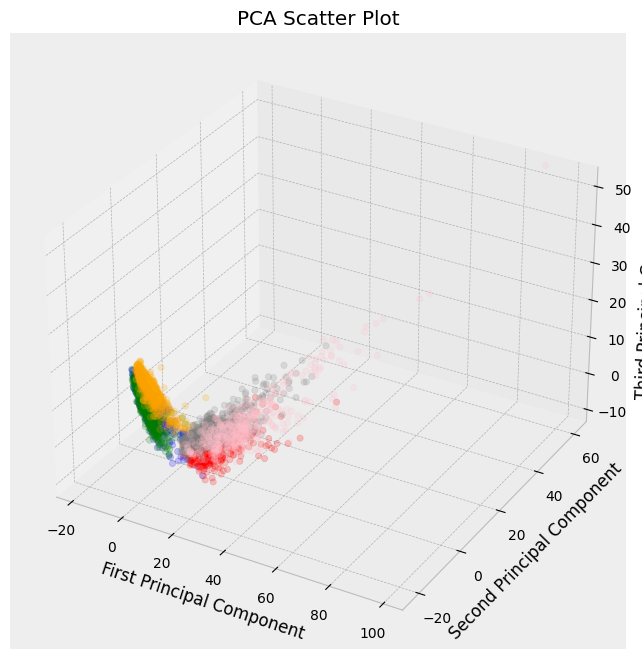

In [17]:
colors = ['green', 'blue', 'orange', 'gray', 'pink', 'red']
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection='3d')
for i in range(len(colors)):
    x = Data_reduced[:, 0][Labels == Labels_keys[i]]
    y = Data_reduced[:, 1][Labels == Labels_keys[i]]
    z = Data_reduced[:, 2][Labels == Labels_keys[i]]
    ax.scatter(xs=x, ys=y, zs=z, zdir='y', s=20, c=colors[i], alpha=0.2)

ax.set_xlabel('First Principal Component')
ax.set_ylabel('Second Principal Component')
ax.set_zlabel('Third Principal Component')
ax.set_title("PCA Scatter Plot")
plt.show()

In [18]:
pca_transform(n_comp=1)
k_means(n_clust=2, data_frame=Data_reduced, true_labels=Labels_binary)

Shape of the new Data df: (3609, 1)


orig_label,0,1
clust_label,,
0,1971,8
1,1,1629


inertia  homo    compl   v-meas   ARI     AMI     silhouette
168716   0.976   0.976   0.976   0.990   0.976    0.794


**Inertia and Silhouette seems to be much better now after reduction. **

**Just check clustering model for 2 components.**


In [19]:
pca_transform(n_comp=2)
k_means(n_clust=2, data_frame=Data_reduced, true_labels=Labels_binary)

Shape of the new Data df: (3609, 2)


orig_label,0,1
clust_label,,
0,1969,6
1,3,1631


inertia  homo    compl   v-meas   ARI     AMI     silhouette
295753   0.975   0.975   0.975   0.990   0.975    0.694
